In order to visualize a dataset you may need to load it using get_data() method beforehand. Not nearly all the data is shown here due to its large volume.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from load_data import get_data
from flow_algo import flow_to_color
from metrics import flow_norm_diff, ang_error, epe_error

Visualizing vectors
====================

In [24]:
def show_flow_vectors():
    for img_num in xrange(len(all_flows)):
        flows = all_flows[img_num]
        h, w = flows[0].shape[:-1]

        x, y = np.meshgrid(np.arange(0, w), np.arange(0, h))
        factor = 12
        x = x[::factor,::factor]
        y = y[::factor,::factor]

        titles = flow_labels
        nrows = len(flows) / 2
        ncols = len(flows)
        # fig = plt.figure(figsize = (7, 7))
        fig = plt.subplots(1, len(flows), figsize = (10, 10))
        for flow_num in xrange(len(flows)):

            u = flows[flow_num][::factor,::factor, 0]
            v = flows[flow_num][::factor,::factor, 1]

            plt.subplot(1, len(flows), flow_num + 1) # with subplots
            plt.axis('off')

            plt.title(titles[flow_num])

            shown_img = plt.imshow(all_imgs[img_num][0])
        #     shown_img = plt.imshow(all_imgs[img_num][0], cmap = 'gray')

            plt.quiver(x, y, u, v, pivot='mid', color='white', angles='xy', headlength=4, antialiased=True,
                       headwidth = 4)

In [22]:
all_flows, all_imgs, flow_labels = get_data('huawei', 'ResolutionChart1')

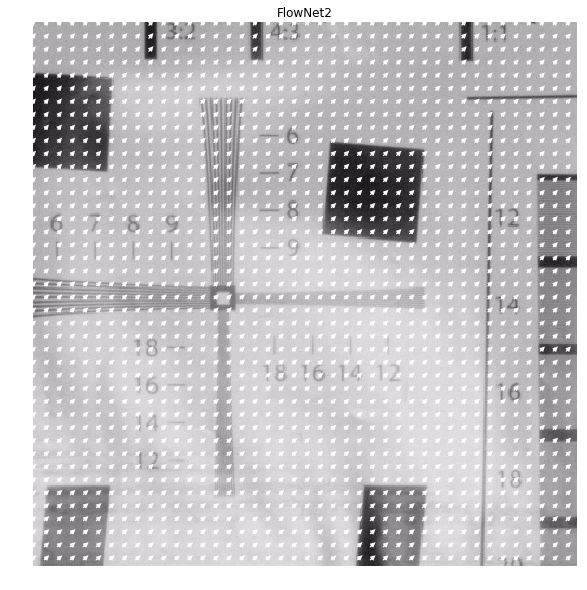

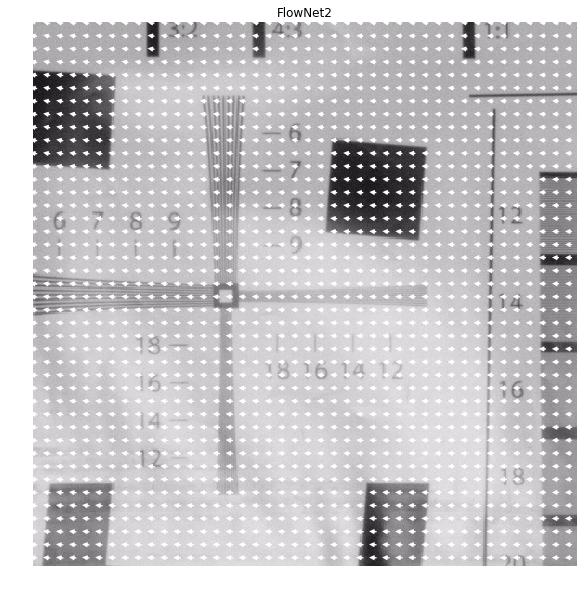

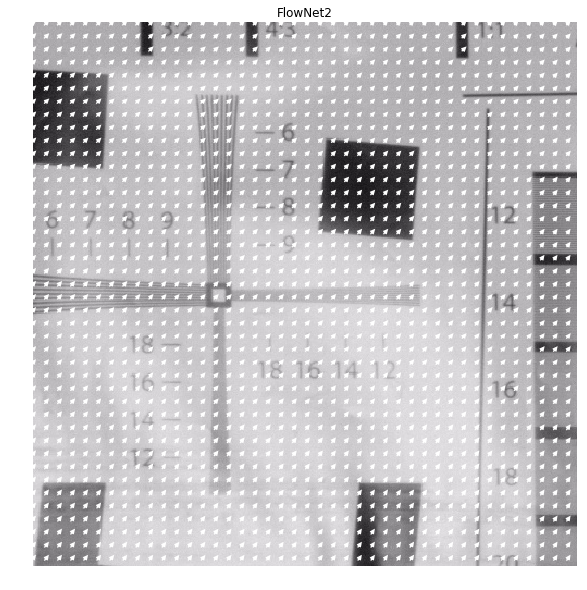

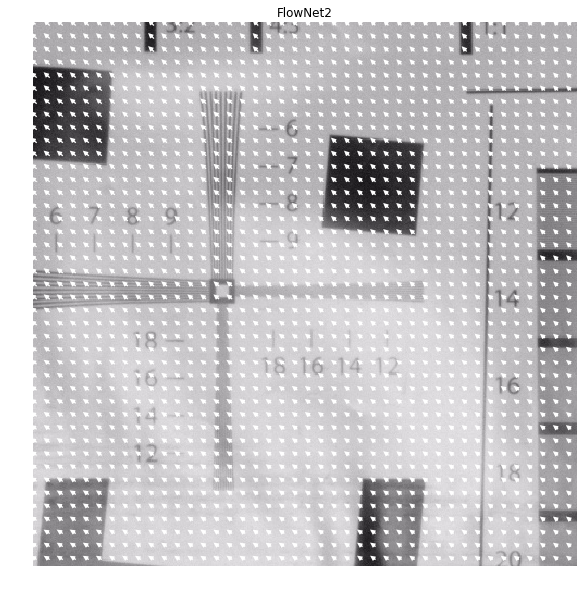

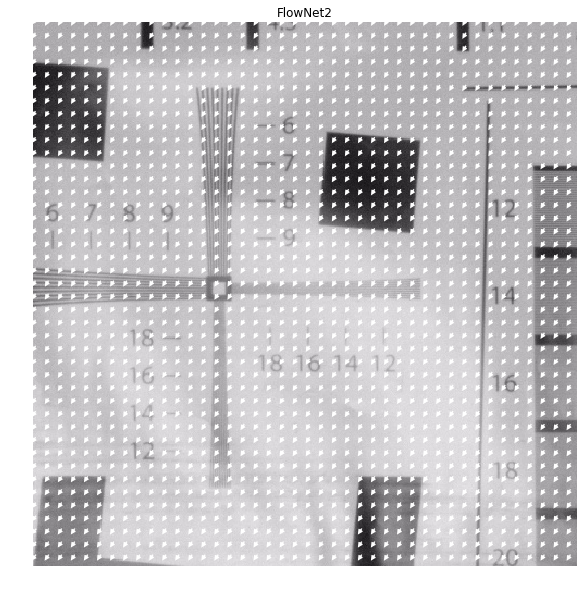

In [23]:
show_flow_vectors()

Colorcoding vectors
================

In [32]:
def show_flow_colors():
    for img_num in xrange(len(all_flows)):
        flows = all_flows[img_num]

        titles = flow_labels
        nrows = len(flows) / 2
        ncols = len(flows)
        fig = plt.subplots(1, len(flows), figsize = (7, 7))
        # fig = plt.figure(figsize = (12, 12))
        for flow_num in xrange(len(flows)):
            plt.subplot(1, len(flows), flow_num + 1)
            plt.axis('off')

            plt.title(titles[flow_num])

            img = flow_to_color(flows[flow_num], norm = True)
            shown_img = plt.imshow(img)

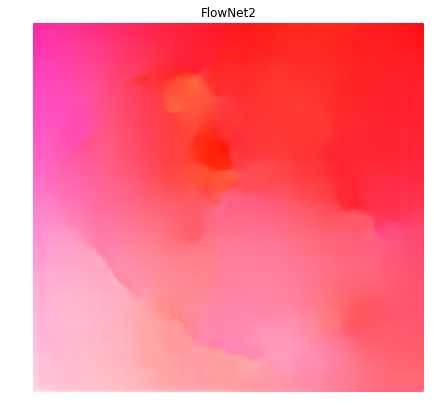

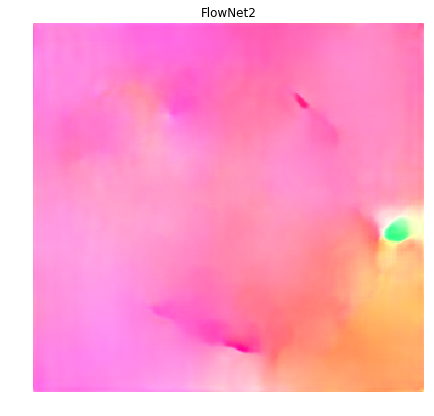

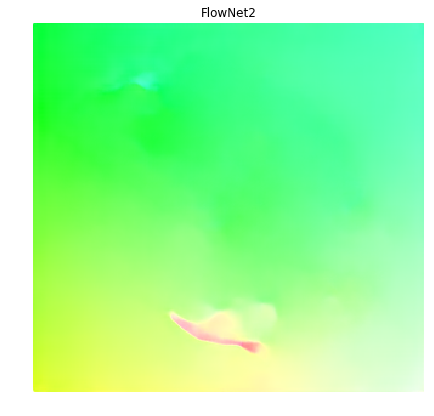

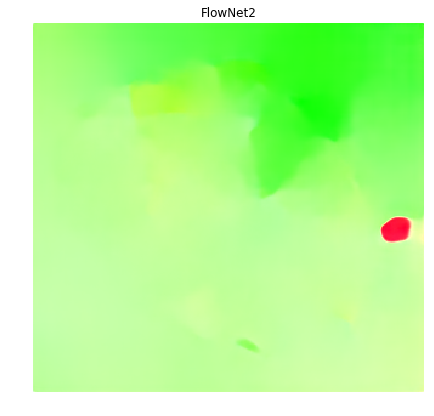

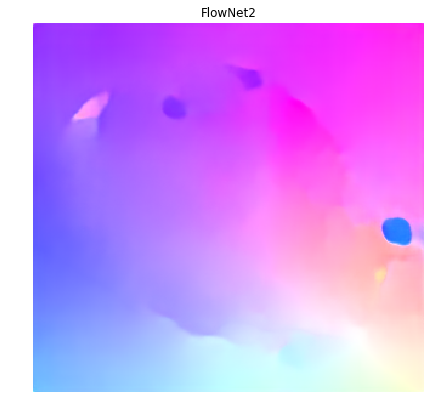

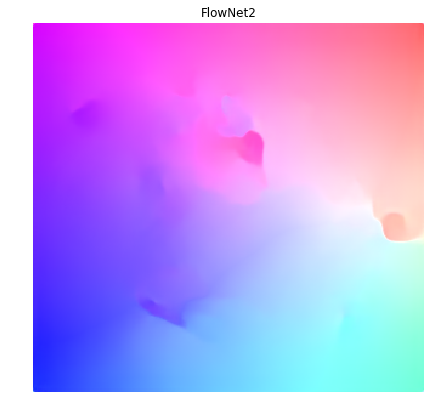

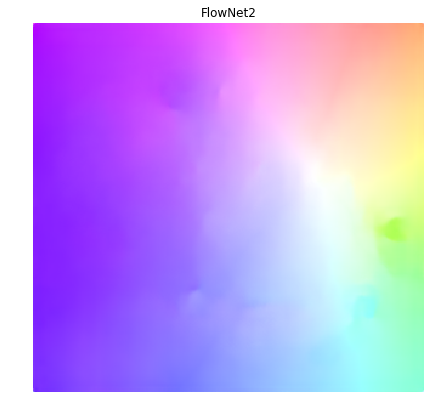

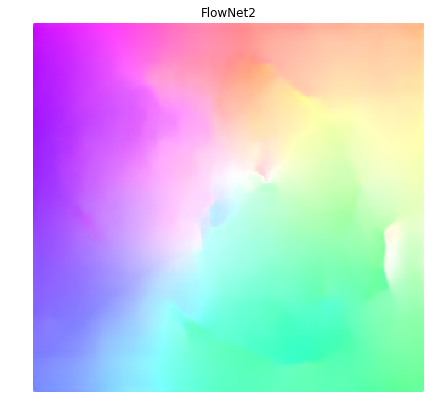

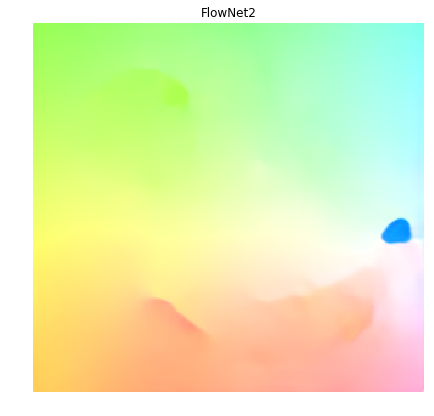

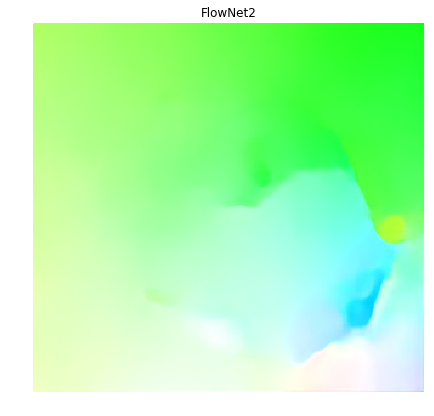

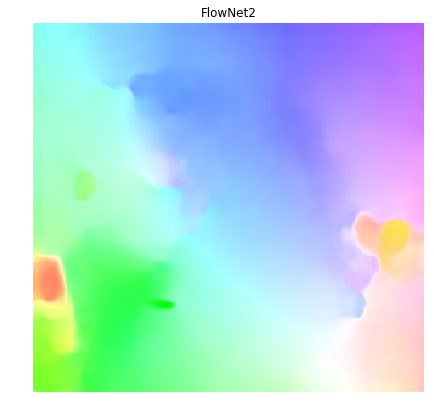

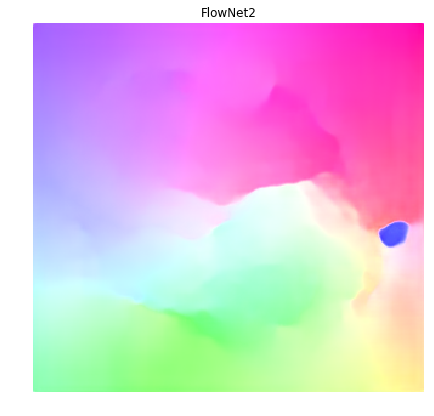

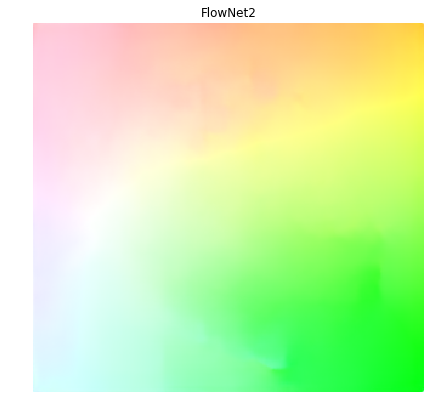

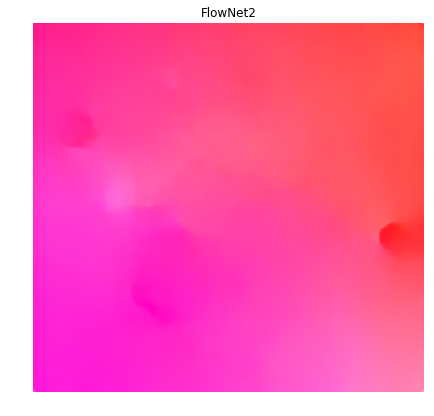

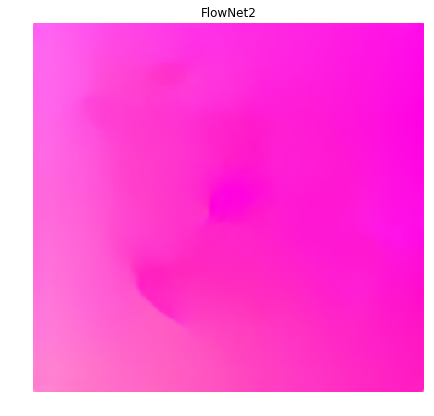

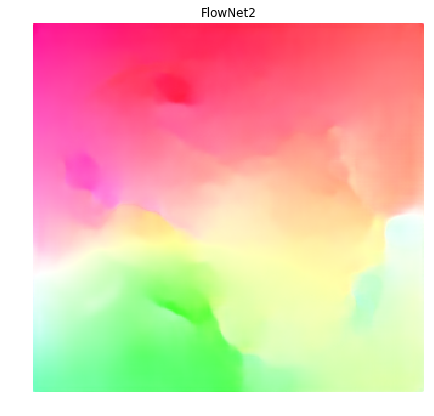

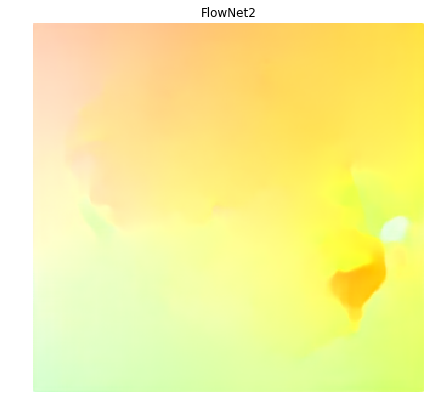

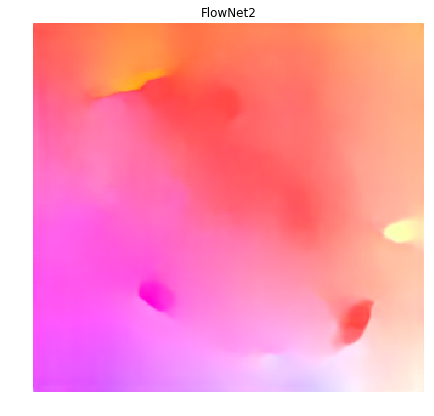

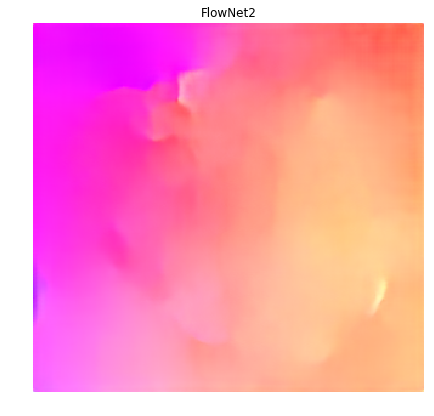

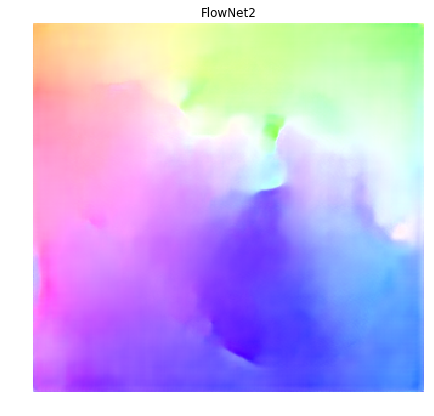

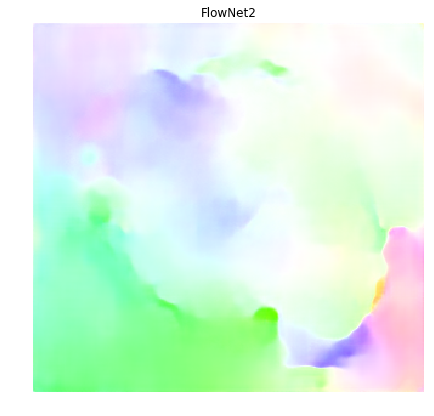

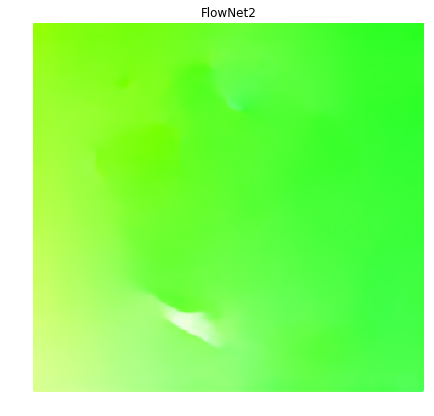

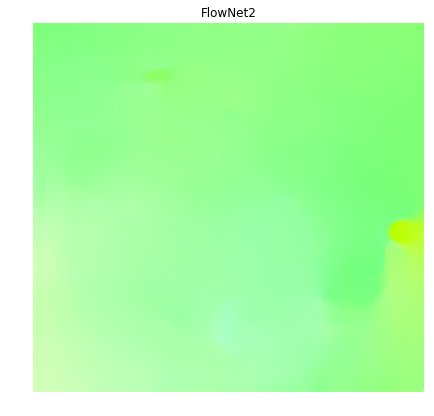

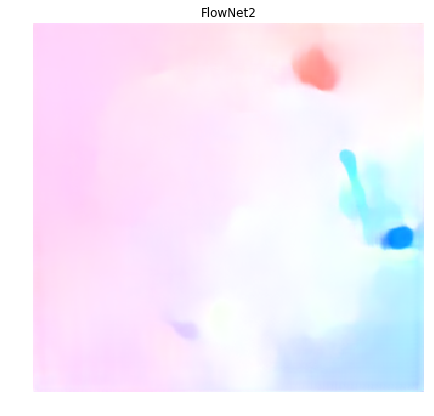

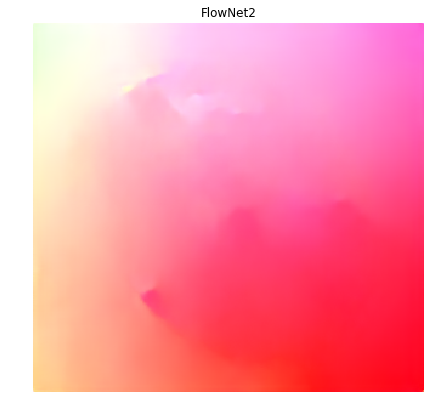

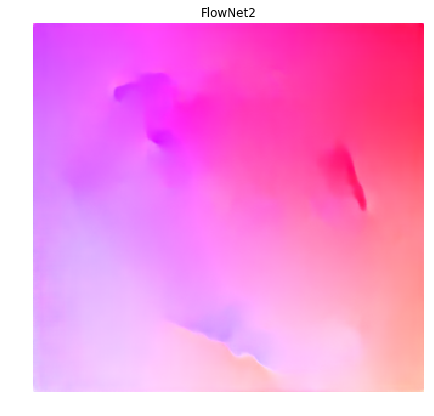

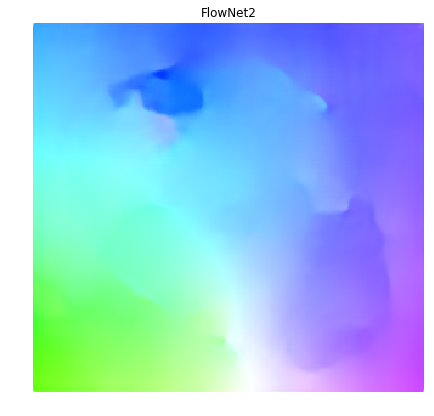

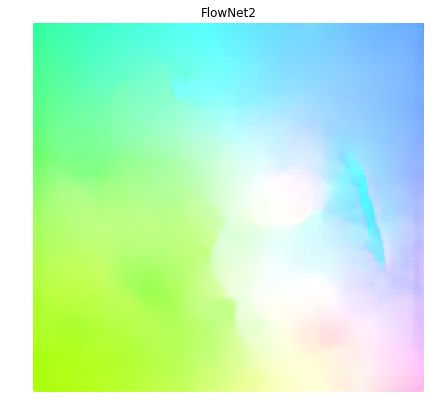

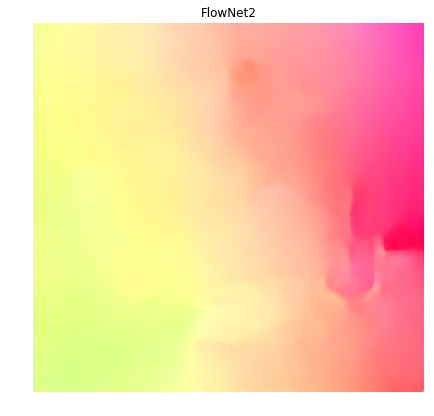

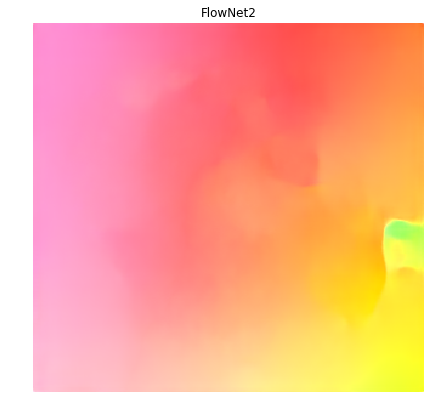

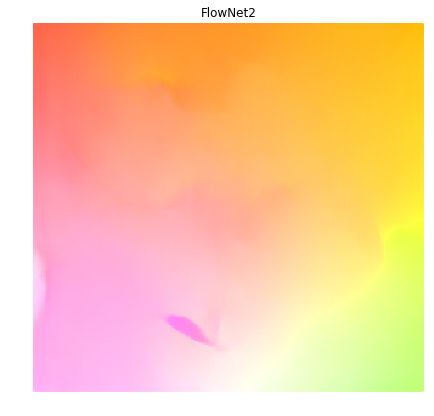

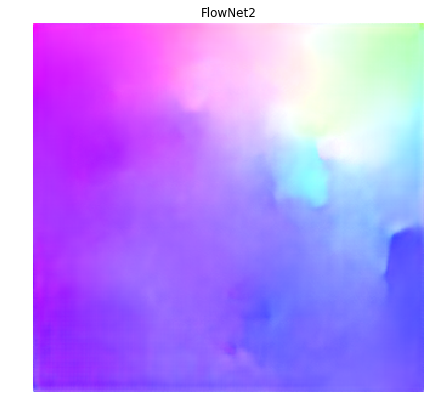

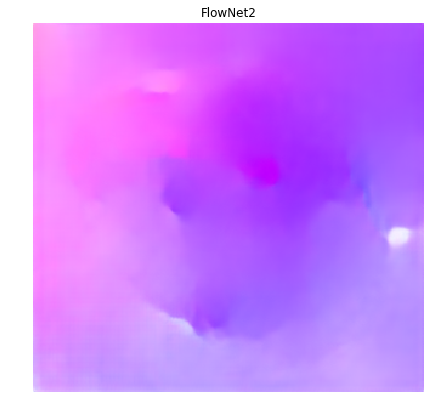

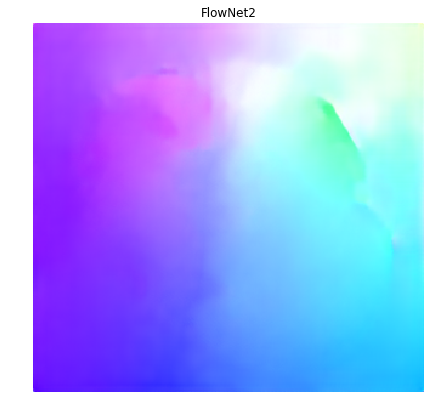

In [34]:
show_flow_colors()

In [90]:
all_flows, all_imgs, flow_labels = get_data('cells', '15/gap1')

In [91]:
first_flows = [all_flows[i][0] for i in xrange(10)]

In [92]:
sum_flow = reduce(np.add, first_flows)

In [93]:
img = flow_to_color(sum_flow, norm = True)

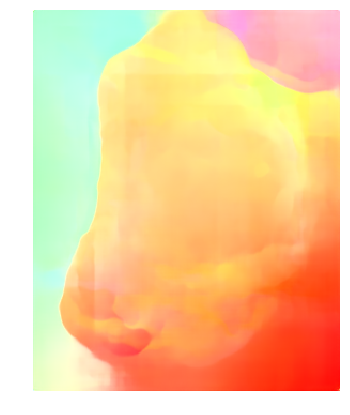

In [94]:
plt.figure(figsize = (7, 7))
plt.axis('off')
shown_img = plt.imshow(img)

Visualizing diff and computing error metrics
===========

In [38]:
def show_diff_metrics():
    for img_num in xrange(8):
        flows = all_flows[img_num]

        titles = flow_labels
        nrows = len(flows) / 2
        ncols = 2
        fig = plt.subplots(1, 2, figsize = (13, 5))

        epe = epe_error(flows)
        ang = ang_error(flows)
        plt.suptitle('EPE: {0:.2f}\nANG: {1:.2f}'.format(epe, ang), fontsize=12)

        plt.subplot(1, 2, 1)
        plt.axis('off')
        plt.title('Ground truth')

        img = flow_to_color(flows[0], norm = True)
        shown_img = plt.imshow(img)

        plt.subplot(1, 2, 2)
        plt.axis('off')
        plt.title('Normalized diff')

        diff = flow_norm_diff(flows)
        shown_img = plt.imshow(diff, cmap = 'gray')

In [39]:
all_flows, all_imgs, flow_labels = get_data('flownetdata_small', '')

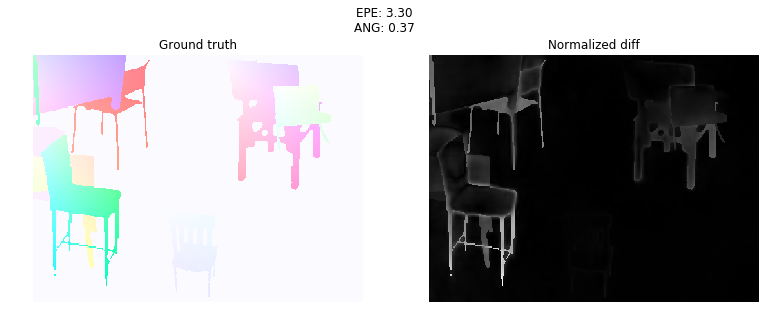

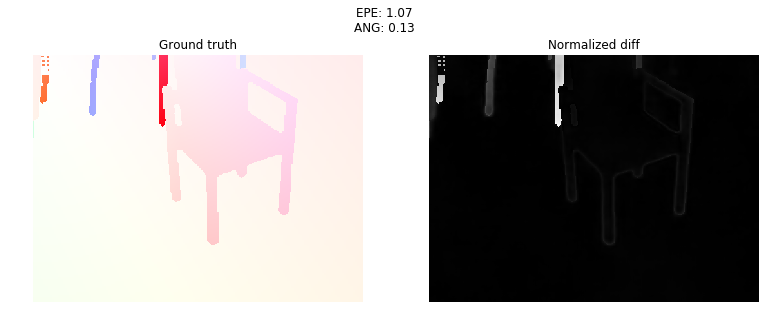

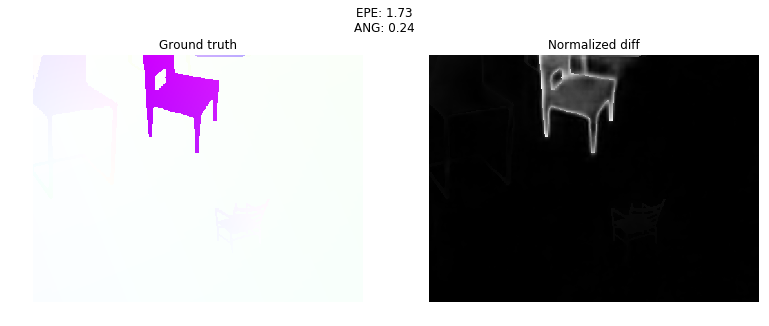

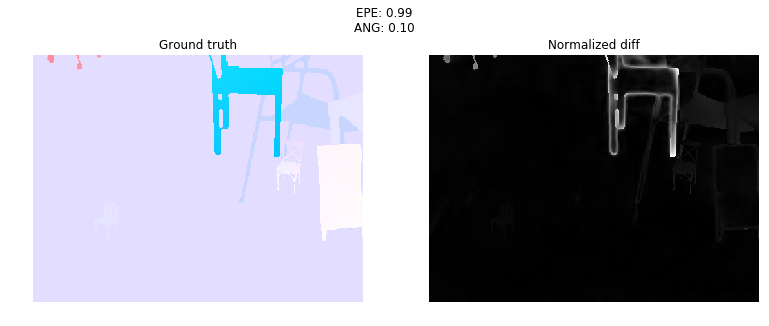

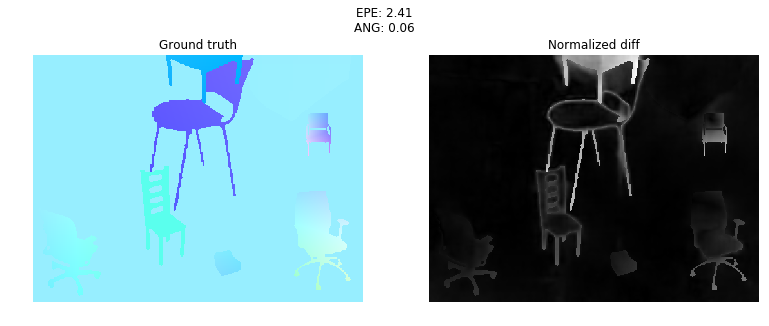

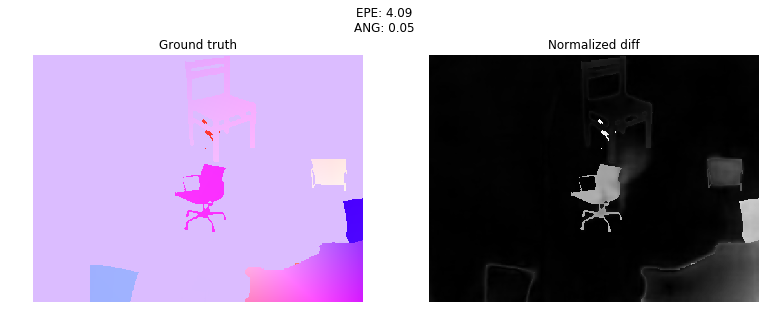

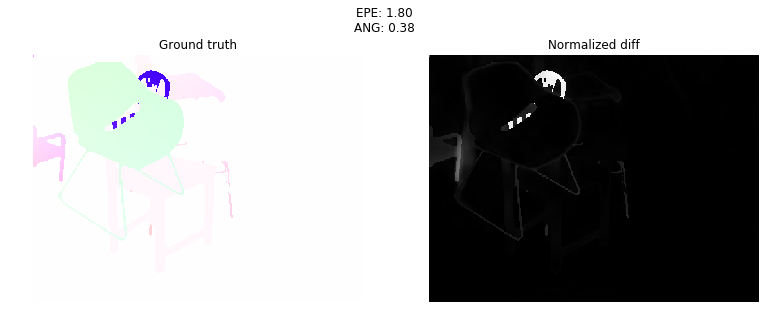

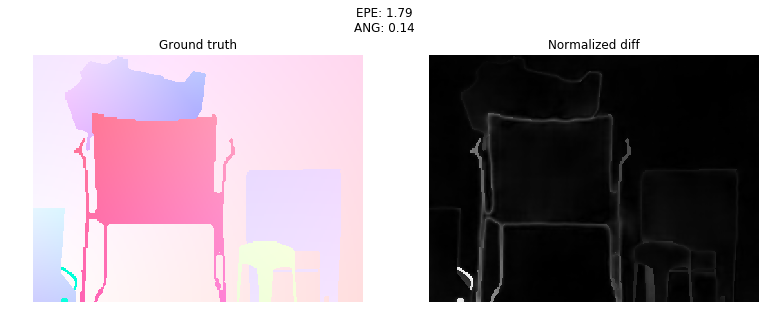

In [40]:
show_diff_metrics()

Blending
==

In [28]:
all_flows, all_imgs, flow_labels = get_data('flownetdata')

In [31]:
def show_blend(imgs):
    shown_img = plt.imshow(imgs[0], alpha = 1)
    shown_img = plt.imshow(imgs[1], alpha = 0.5)

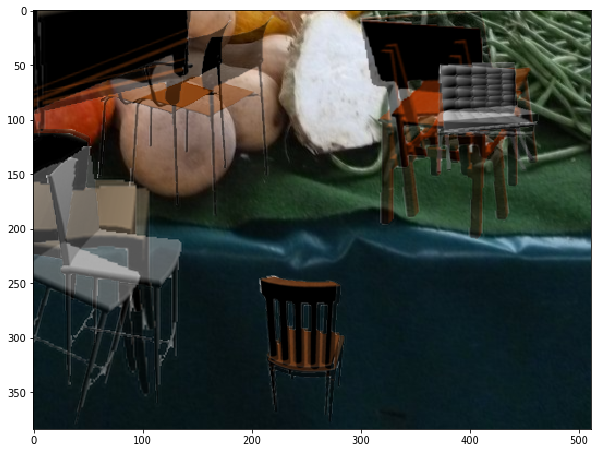

In [32]:
img_num = 0
plt.figure(figsize = (10, 10))
show_blend(all_imgs[img_num])